Inspiration: https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh&index=2

In [194]:
import torch
import torchvision
from torchvision import datasets, transforms

In [195]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [196]:
trainset = torch.utils.data.DataLoader(train, shuffle=True, batch_size=10)

testset = torch.utils.data.DataLoader(test, shuffle=True, batch_size=10)

In [197]:
# 'Generalization' is the Name of the Game

# (i) Batching - Not training all data at once; 
# (ii) Shuffling - When picking up samples, do not pick up ALL '1's in a batch. Have a good mix of all numbers.

In [198]:
# Check the Data

for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [199]:
# x = Image Data of 1 batch (Here, 1 batch has 10 data points)
# y = Labels of 1 batch
x, y = data

In [200]:
# Check the first image
x[0].shape

torch.Size([1, 28, 28])

In [201]:
print(y)

tensor([0, 3, 9, 6, 8, 7, 3, 5, 6, 7])


In [202]:
# Checking if Data Imbalance is present in Dataset

total = 0

counter_dict = {0:0,
                1:0,
                2:0,
                3:0,
                4:0,
                5:0,
                6:0,
                7:0,
                8:0,
                9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
for key in counter_dict:
    counter_dict[key] = counter_dict[key] * 100 / total
    print(key, ":", round(counter_dict[key], 2), "%")
    
# Almost equal distribution, nothing to worry about

0 : 9.87 %
1 : 11.24 %
2 : 9.93 %
3 : 10.22 %
4 : 9.74 %
5 : 9.04 %
6 : 9.86 %
7 : 10.44 %
8 : 9.75 %
9 : 9.91 %


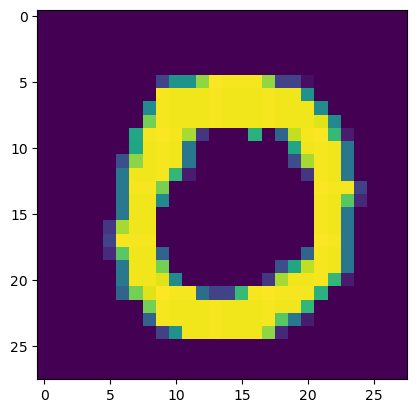

In [203]:
import matplotlib.pyplot as plt

plt.imshow(x[0].view([28, 28]))

<h3>Building the Neural Net</h3>

In [204]:
import torch.nn as nn
import torch.nn.functional as F

In [206]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # fc1 = Fully Connected '1'st layer with '28*28' i/p & '64' o/p
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x): # Feed Forward Method 
        
        x = self.fc1(x) # Pass data 'x' through layer.
        x = F.relu(x) # Use the activation function in 'torch.nn.functional as F' helper library
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) # 'dim=1' will aim to make summation of Probab(classes) equal to 1
        # 'dim=0' will aim to make summation of Probab across batches = 1 -> WRONG
    
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


<h4>*** Extra ***
    
In forward() function
you can specify:</h4>

if weather == 'sunny':

    x = F.relu(self.fc2(x))
    
else:

    x = F.softmax(self.fc2(x))
    
    
and build complex networks & models!

In [208]:
# Let's check if the neural net is working
# Creating a random input array

X = torch.rand([28, 28])
X = X.view([1, 28*28])


In [209]:
output = net(X)

In [210]:
output

tensor([[-2.3919, -2.2632, -2.3243, -2.3167, -2.4719, -2.1425, -2.2302, -2.2590,
         -2.3464, -2.3165]], grad_fn=<LogSoftmaxBackward0>)

<h3>Model Training</h3>

In [211]:
# Important: Loss & Optimizer

# Loss: E.g. 60% confidence it's a '1' & 
#            20% confidence it's a '2'.
# We WANT loss to be lower (i.e.) 100% confidence it's a '1'.

# Optimizer will aim to lower the loss over time (based on learning rate).

# Note: WE optimize for loss, and accuracy automatically follows.

In [226]:
# Calculate Accuracy of Model

def CheckAccuracy():
    correct = 0
    total = 0
    
    # net.eval() deactivates Dropout & BatchNorm. Required when testing accuracy.
    with torch.no_grad():
        for data in testset:
            X, y = data
            output = net(X.view(-1, 28*28))

            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1
                
    return round(correct/total, 3)

In [227]:
# net.train() activates Dropout & BatchNorm
net = net.train()

In [228]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

# 1 Whole pass through Dataset = 1 Epoch
EPOCHS = 10

# To plot the graphs
loss_per_epoch = []
accuracy_per_epoch = []

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        
        net.zero_grad()
        
        # Pass data through Neural Network
        output = net(X.view(-1, 28*28)) 
        
        # Here, since output is just 1 value, use 'nll' loss
        loss = F.nll_loss(output, y) # If your data is a '1-hot vector', use mean squared error.
        loss.backward()
        
        optimizer.step()
    
    # Verbose
    accu = CheckAccuracy()
    print(f"Epoch {epoch+1} completed. Loss = {loss}, Accuracy = {accu}")
    
    # To plot graphs
    loss_per_epoch.append(loss)
    accuracy_per_epoch.append(accu)

Epoch 1 completed. Loss = 0.004478464834392071, Accuracy = 0.975
Epoch 2 completed. Loss = 1.3708980759474798e-06, Accuracy = 0.973
Epoch 3 completed. Loss = 6.35803589830175e-05, Accuracy = 0.977
Epoch 4 completed. Loss = 4.887570526079799e-07, Accuracy = 0.975
Epoch 5 completed. Loss = 3.539889439707622e-05, Accuracy = 0.974
Epoch 6 completed. Loss = 0.0003659407957457006, Accuracy = 0.974
Epoch 7 completed. Loss = 0.0104250842705369, Accuracy = 0.974
Epoch 8 completed. Loss = 4.3272038965369575e-06, Accuracy = 0.974
Epoch 9 completed. Loss = 0.0, Accuracy = 0.973
Epoch 10 completed. Loss = 0.0005603875615634024, Accuracy = 0.978


In [229]:
loss_per_epoch = [float(x) for x in loss_per_epoch]
accuracy_per_epoch = [float(x) for x in accuracy_per_epoch]

Text(0, 0.5, 'Loss')

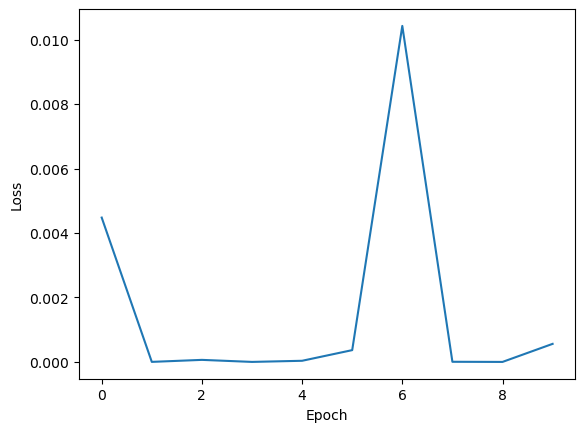

In [235]:
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

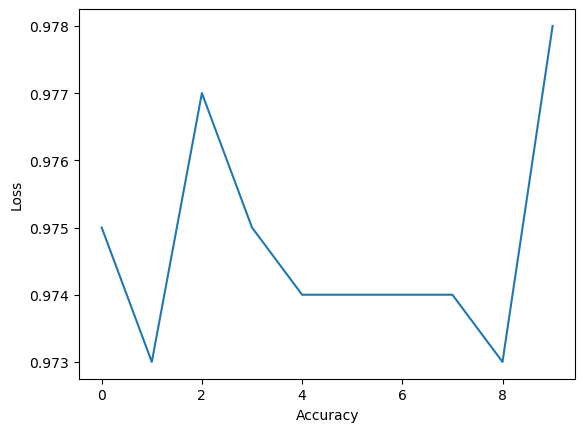

In [237]:
plt.plot(range(len(accuracy_per_epoch)), accuracy_per_epoch)
plt.xlabel("Accuracy")
plt.ylabel("Loss")

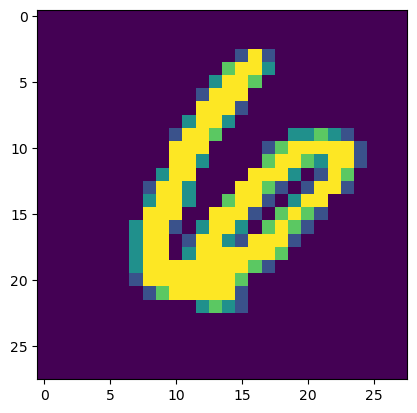

In [238]:
# Checking manually for Image & Output

import matplotlib.pyplot as plt

plt.imshow(X[3].view(28, 28))
plt.show()

In [249]:
out = net(X[3].view(-1, 784))
out = out[0]
torch.argmax(out)

tensor(6)